In [1]:
import numpy as np

***Calculations:***

In [2]:
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 103.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 122.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 92.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

In [3]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Range Lat Lon calculation
import math

def calculate_range(lat, lon, distance):
    # Earth's radius in meters
    R = 6378137.0

    # Convert distance from meters to radians
    dist_lat = distance / R
    dist_lon = distance / (R * math.cos(math.pi * lat / 180.0))
    #print(f'dist_lon : {dist_lon}')

    # Convert initial lat/lon to radians
    lat_rad = math.radians(lat)
    lon_rad = math.radians(lon)

    # Calculate range of latitude and longitude
    lat_min = math.degrees(lat_rad - dist_lat)
    lat_max = math.degrees(lat_rad + dist_lat)
    lon_min = math.degrees(lon_rad - dist_lon)
    lon_max = math.degrees(lon_rad + dist_lon)

    return (lat_min, lat_max, lon_min, lon_max)


In [5]:
# Initial point
lat = 51.330735
lon = -0.261767	
distance = 300 

lat_min, lat_max, lon_min, lon_max = calculate_range(lat, lon, distance)

print(f"Latitude Range: {lat_min} to {lat_max}")
print(f"Longitude Range: {lon_min} to {lon_max}")

Latitude Range: 51.32804005414764 to 51.33342994585235
Longitude Range: -0.2660801284755933 to -0.25745387152440674


In [24]:
import osmnx as ox
import matplotlib.pyplot as plt
import pyproj
import statistics
from collections import Counter

def plot_points_on_map(lat_min, lat_max, lon_min, lon_max, points, dpi=300, filename="points_on_map.png"):
    """
    Plots points on an OSMnx map.

    Args:
        lat_min (float): The minimum latitude.
        lat_max (float): The maximum latitude.
        lon_min (float): The minimum longitude.
        lon_max (float): The maximum longitude.
        points (list of tuples): A list of (latitude, longitude) tuples for each point.
        dpi (int, optional): The image resolution (default: 300).
        filename (str, optional): The filename to save the image as (default: "points_on_map.png").
    """
    # Download the map data
    graph = ox.graph_from_bbox(lat_max, lat_min, lon_max, lon_min, network_type="all_private", simplify=False, retain_all=True)

    # Project the graph
    graph_proj = ox.project_graph(graph)
    project_crs = graph_proj.graph['crs']

    # Plot the map
    fig, ax = ox.plot_graph(graph_proj, figsize=(10, 10), dpi=dpi, bgcolor="white", node_size=0, edge_color="gray", edge_linewidth=0.5, save=True, filepath=filename, show=False, close=False)

    point_repetitions = Counter(points)
    
    transformer = pyproj.Transformer.from_crs(pyproj.CRS('EPSG:4326'), project_crs, always_xy=True)
    # Project and plot location point on the map
    x, y = transformer.transform(statistics.mean([lon_min, lon_max]), statistics.mean([lat_min, lat_max]))
    ax.scatter(x, y, c="red", zorder=100, s=300)

    # Project and plot crime points on the map
    #transformer = pyproj.Transformer.from_crs(pyproj.CRS('EPSG:4326'), project_crs, always_xy=True)
    for point in points:
        x, y = transformer.transform(point[1], point[0])
        ax.scatter(x, y, c="blue", zorder=100, s=50)
    for point, count in point_repetitions.items():
        x, y = transformer.transform(point[1], point[0])
        ax.text(x, y, f' {count}', fontsize=12)    
      
    plt.show()


[Crime Map](https://www.police.uk/pu/your-area/surrey-police/weybourne-badshot-lea-and-moor-park/?tab=CrimeMap)


In [7]:
import pandas as pd

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:

df_2022_10 = pd.read_csv("/content/drive/MyDrive/data/2022-10-surrey-street.csv")
df_2022_11 = pd.read_csv("/content/drive/MyDrive/data/2022-11-surrey-street.csv")
df_2022_12 = pd.read_csv("/content/drive/MyDrive/data/2022-12-surrey-street.csv")
df_2023_01 = pd.read_csv("/content/drive/MyDrive/data/2023-01-surrey-street.csv")
df_2023_02 = pd.read_csv("/content/drive/MyDrive/data/2023-02-surrey-street.csv")
df_2023_03 = pd.read_csv("/content/drive/MyDrive/data/2023-03-surrey-street.csv")

In [10]:
df = pd.concat([df_2022_10, df_2022_11, df_2022_12, df_2023_01, df_2023_02, df_2023_03], ignore_index=True, sort=False)

In [83]:
def show_all_info (lat, lon, distance):
    lat_min, lat_max, lon_min, lon_max = calculate_range(lat, lon, distance)
    #print(f'lat_min: {lat_min} lat_max: {lat_max} lon_min: {lon_min} lon_max: {lon_max}')
    #print(type(df['Longitude'][0]))
    filtered_df_by_place = df.query(f'Longitude  >= {np.float64(lon_min)} & Longitude  <= {np.float64(lon_max)} & Latitude  >= {np.float64(lat_min)} & Latitude  <= {np.float64(lat_max)}')
    #filtered_df_by_place = df.loc[(df['Longitude']>=lon_min) & (df['Longitude']<=lon_max) & (df['Latitude']>=lat_min) & (df['Longitude']<=lat_max)]
    #print(f'Total number of crimes in Zone: {filtered_df_by_place.shape[0]}')
    
    # Create the bar plot Crimes by Monthes
    # Data for the plot
    x = ["10_2022", "11_2022", "12_2022", "01_2023", "02_2023", "03_2023"]
    y = [filtered_df_by_place.loc[(df['Month']=='2022-10')].shape[0], filtered_df_by_place.loc[(df['Month']=='2022-11')].shape[0], filtered_df_by_place.loc[(df['Month']=='2022-12')].shape[0],\
         filtered_df_by_place.loc[(df['Month']=='2023-01')].shape[0], filtered_df_by_place.loc[(df['Month']=='2023-02')].shape[0], filtered_df_by_place.loc[(df['Month']=='2023-03')].shape[0]]
    
    plt.bar(x, y)

    # Add a title and axis labels
    plt.title("Crimes in Zone during 6 Monthes")
    plt.xlabel("Month")
    plt.ylabel("Crime Number")

    # Show the plot
    plt.show() 

    # Create the bar plot Types of Crimes
    # Data for the plot

    x_crimes =  []
    y_crimes =  []
    crime_type_list = filtered_df_by_place['Crime type'].tolist()
    crime_type_repetitions = Counter(crime_type_list)
    for type_crime, count in crime_type_repetitions.items():
        x_crimes.append(type_crime)
        y_crimes.append(count)

    
    # Define colors for each bar
    colors = ['red', 'blue', 'green', 'yellow', 'orange'] * len(x_crimes)

    plt.bar(x_crimes, y_crimes, color=colors[:len(x_crimes)])

    # Add a title and axis labels
    plt.title("Crimes by Types")
    plt.xlabel("Type of Crime")
    plt.ylabel("Crime Number")

    plt.xticks(rotation=90)
    
    # Calculate and add total number of crimes
    total_crimes = sum(y_crimes)
    plt.text(len(x_crimes)-1, max(y_crimes), f'Total: {total_crimes}', fontsize=16, ha='right', va='bottom')
        
    
    # Show the plot
    plt.show() 


    # Define points as a list of (latitude, longitude) tuples of Crimes in Zone
    
    latitude_list = filtered_df_by_place['Latitude'].tolist()
    longitude_list = filtered_df_by_place['Longitude'].tolist()
    
    
    points = list(zip(latitude_list, longitude_list))
    
    
    
    #points = [(lat, lon)]


    # Plot points on the map
    plot_points_on_map(lat_min, lat_max, lon_min, lon_max, points, filename="points_on_map.png")

    
    
    return filtered_df_by_place

In [12]:
df.shape

(42504, 12)

In [84]:
df.head(5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,94293ee6e0d5646d6a1e6ce62906ef7724755074adc4ad...,2022-10,Surrey Police,Surrey Police,-1.106170,51.242514,On or near Wagner Close,E01022480,Basingstoke and Deane 016C,Public order,Status update unavailable,NaN
1,a712c7d0ecf066df346562097b6c4181735d2ebaa2deb7...,2022-10,Surrey Police,Surrey Police,-0.745635,51.416793,On or near,E01016249,Bracknell Forest 007D,Violence and sexual offences,Status update unavailable,NaN
2,86cf0b66d5d9448338d2d84bf822d6bb9e6345ea7f8736...,2022-10,Surrey Police,Surrey Police,-0.101292,51.514770,On or near Amen Court,E01032739,City of London 001F,Burglary,Unable to prosecute suspect,NaN
3,bfee13305685cdec5135f302204bd969fe786ea619ee1f...,2022-10,Surrey Police,Surrey Police,-0.101292,51.514770,On or near Amen Court,E01032739,City of London 001F,Criminal damage and arson,Unable to prosecute suspect,NaN
4,5d7ca3f795565239fd908c5b73d32e9e680369049cea8c...,2022-10,Surrey Police,Surrey Police,-0.101292,51.514770,On or near Amen Court,E01032739,City of London 001F,Drugs,Status update unavailable,NaN


# ***Вимоги:***



1.   Відстань до школи Вані (пешехідна доступність до 3 км)
1.   Відстань до школи Семена (пешехідна доступність до 3 км)
2.   Відстань до найближчого продовольчого магазину (пешехідна доступність до 1 км)
2.   Відстань до автобусної зупинки (пешехідна доступність до 2 км)
2.   Відстань до ЖД станції (пешехідна доступність до 2 км)
3.   Відстань до Barley Mow 
4.   Відстань до Guildford 
4.  R



# **locked list:**


1.   Aldershot




# **Recomended list:**


1.   Ash
2.   Ash vale
3.   Farnboro
4.   Farnham

# **Need to be googled:**


1.   Hale
2.   Toungham


# ***RESEACH***

# ***1. Ash***

# ***OPTIONS:***

[Hale Road, Farnham, GU9
](https://www.rightmove.co.uk/properties/134293382?utm_campaign=property-details&utm_content=lettings&utm_medium=sharing&utm_source=whatsapp#/&channel=RES_LET)

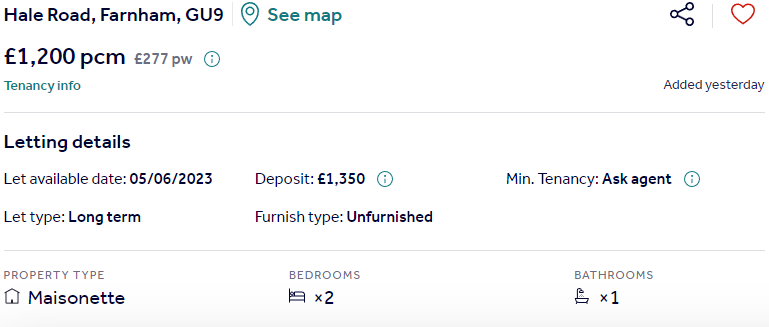

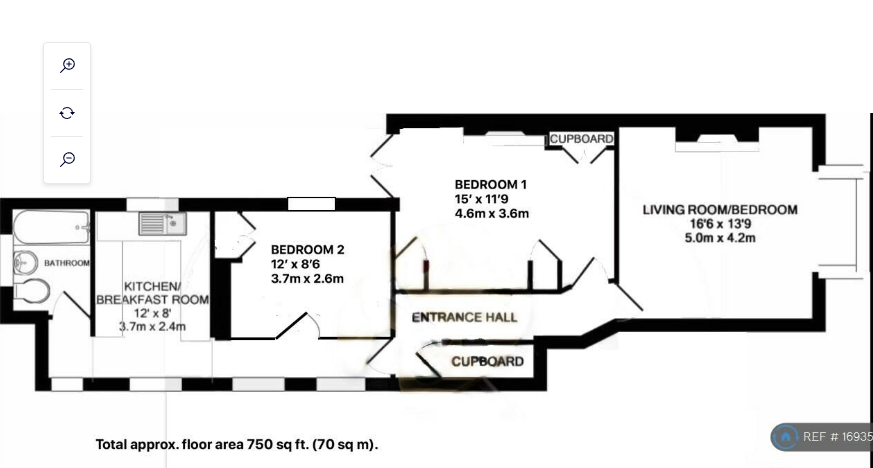

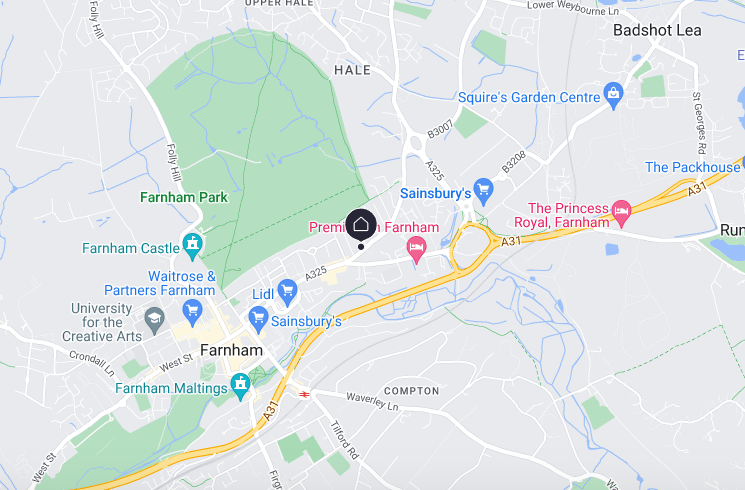

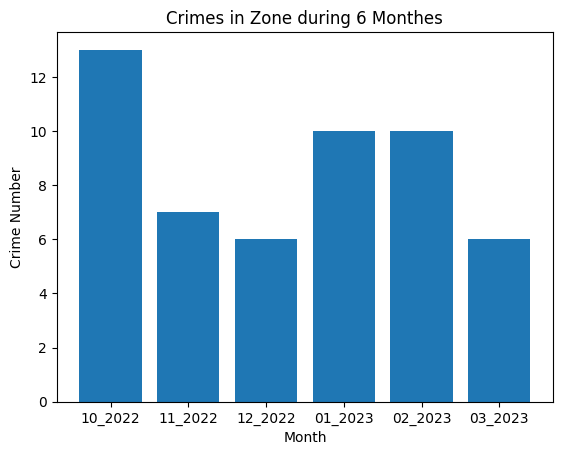

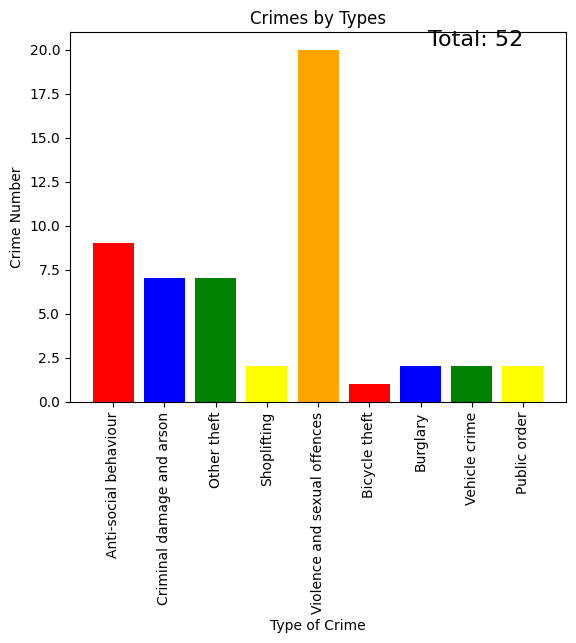

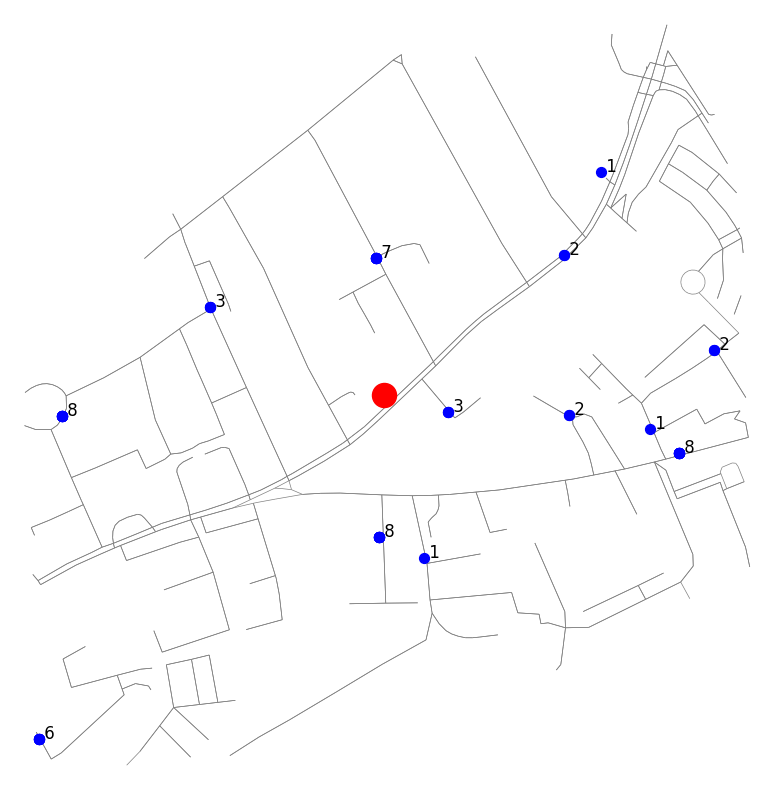

In [85]:
# Initial point

lat = 51.219639122359055
lon = -0.7877747459756285	
distance = 300 

res = show_all_info (lat, lon, distance)
#res

------------------------------------------------------------------------------------------------

[Tongham Meadows, Tongham, Farnham, GU10](https://www.rightmove.co.uk/properties/134096852?utm_campaign=property-details&utm_content=lettings&utm_medium=sharing&utm_source=whatsapp#/&channel=RES_LET)

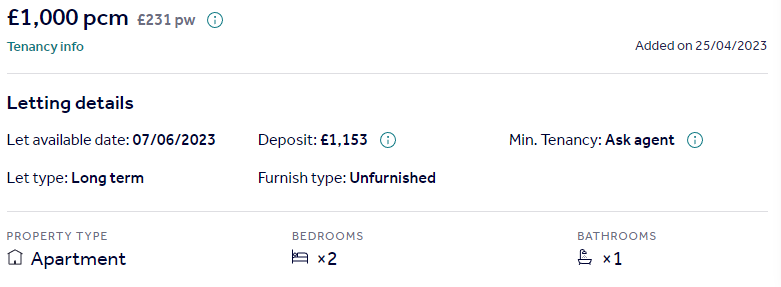

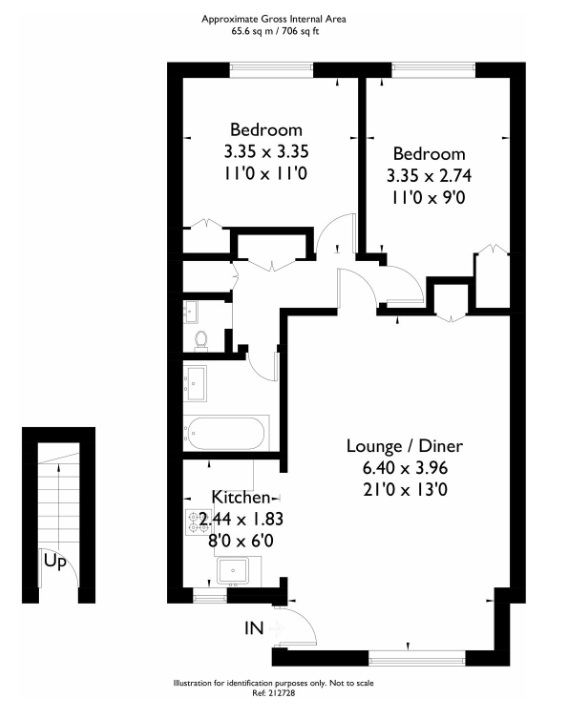

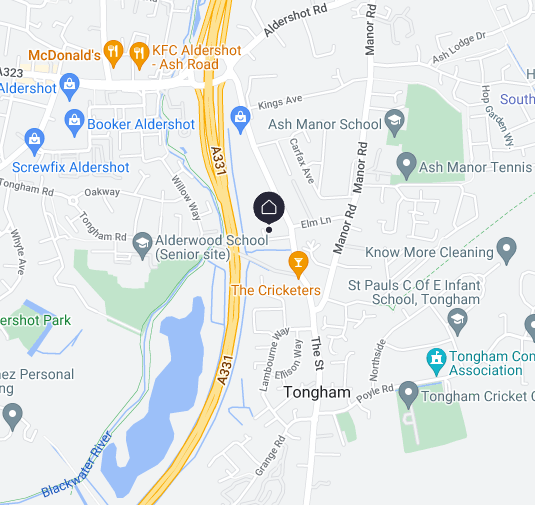

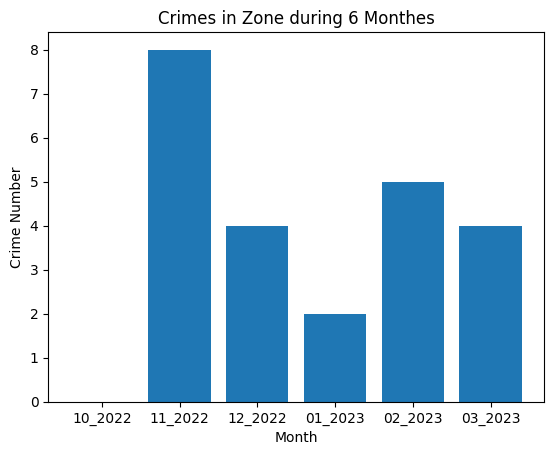

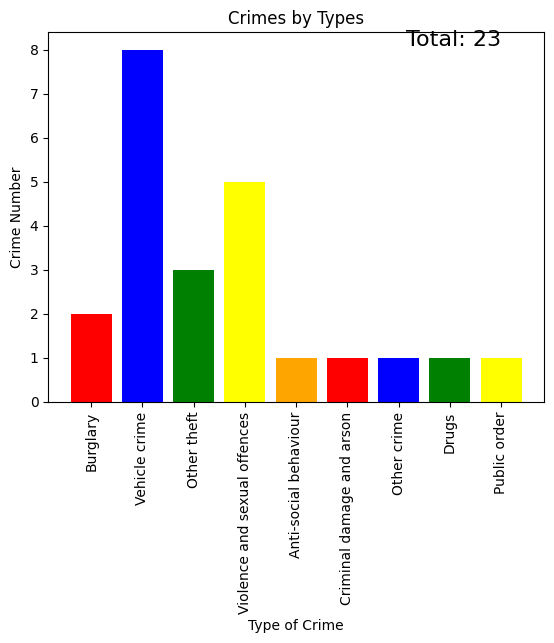

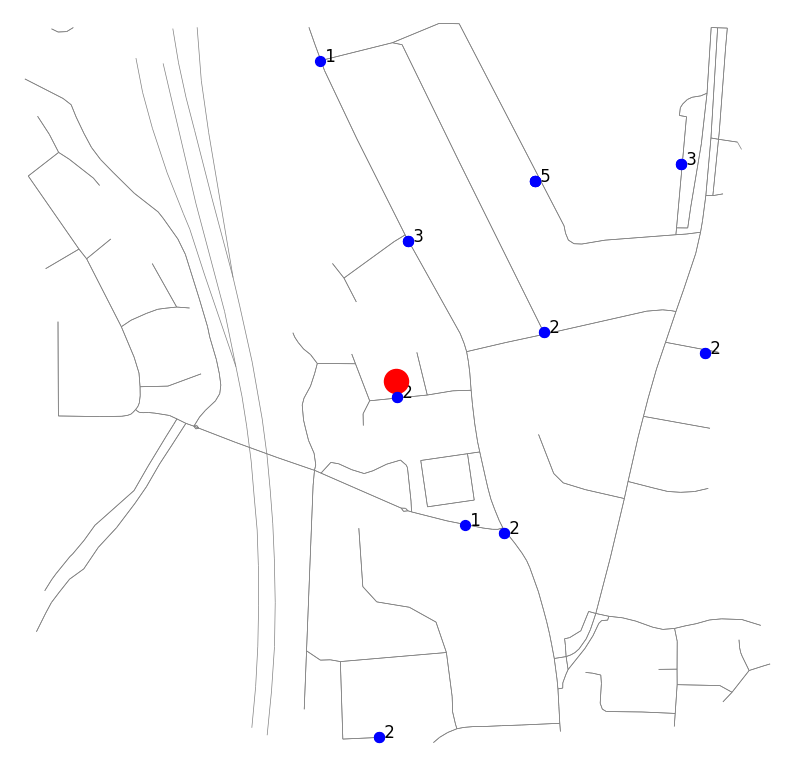

In [87]:
# Initial point

lat = 51.23770150509955
lon = -0.7336248313169349	
distance = 300 

res = show_all_info (lat, lon, distance)
#res

------------------------------------------------------------------------------------------------

[Warren Close, Farnham, Surrey, GU9](https://www.rightmove.co.uk/properties/134046485?utm_campaign=property-details&utm_content=lettings&utm_medium=sharing&utm_source=whatsapp#/&channel=RES_LET)

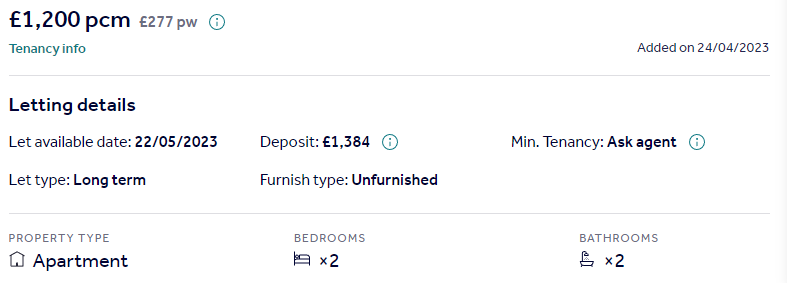

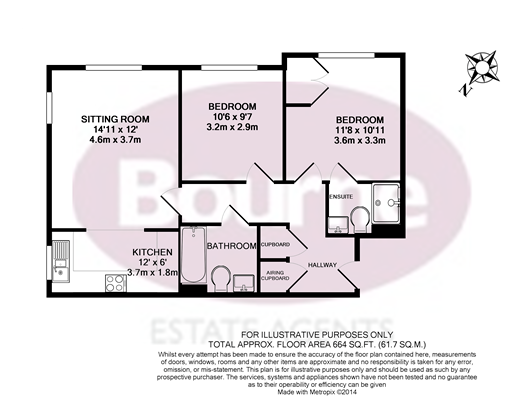

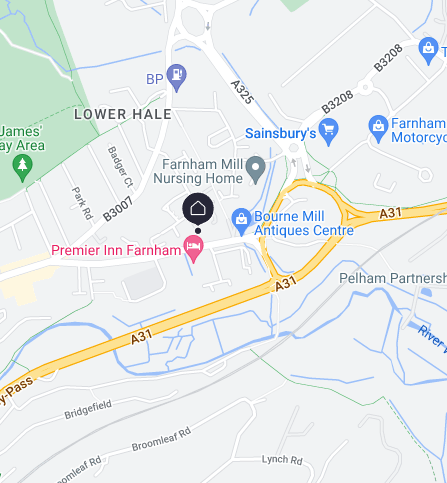

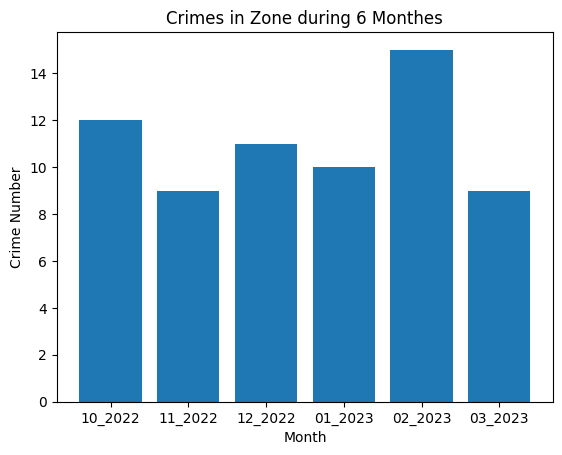

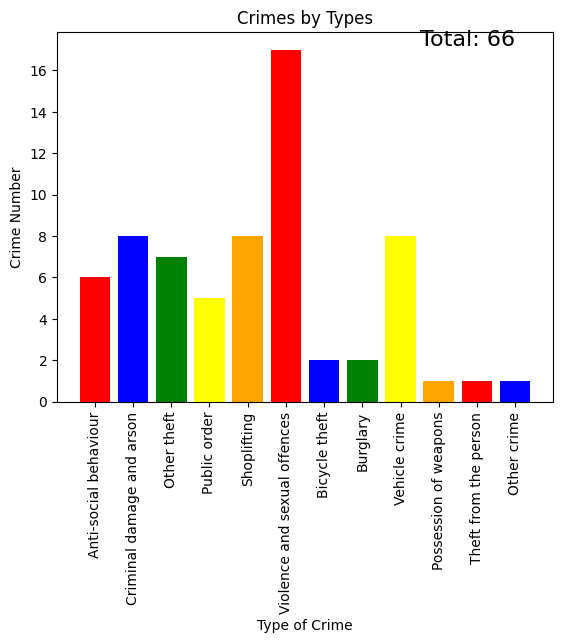

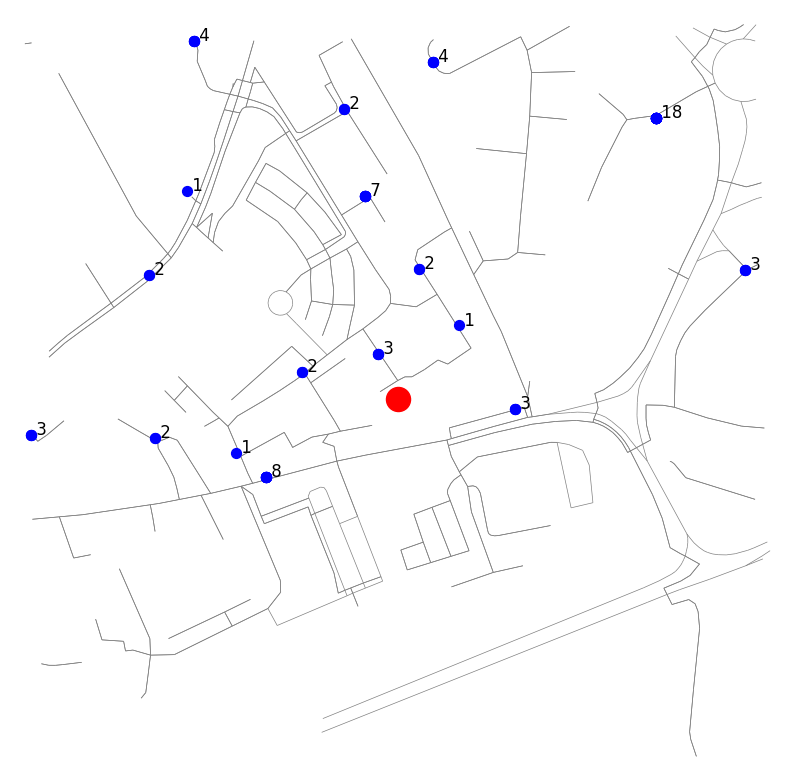

In [89]:

# Initial point

lat = 51.219678879186965
lon = -0.7827488698749091	
distance = 300 

res = show_all_info (lat, lon, distance)
#res

------------------------------------------------------------------------------------------------

[Paviors, Farnham](https://www.rightmove.co.uk/properties/134014295?utm_campaign=property-details&utm_content=lettings&utm_medium=sharing&utm_source=whatsapp#/&channel=RES_LET)

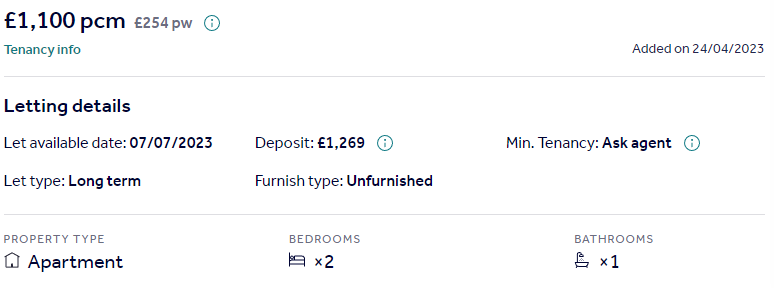

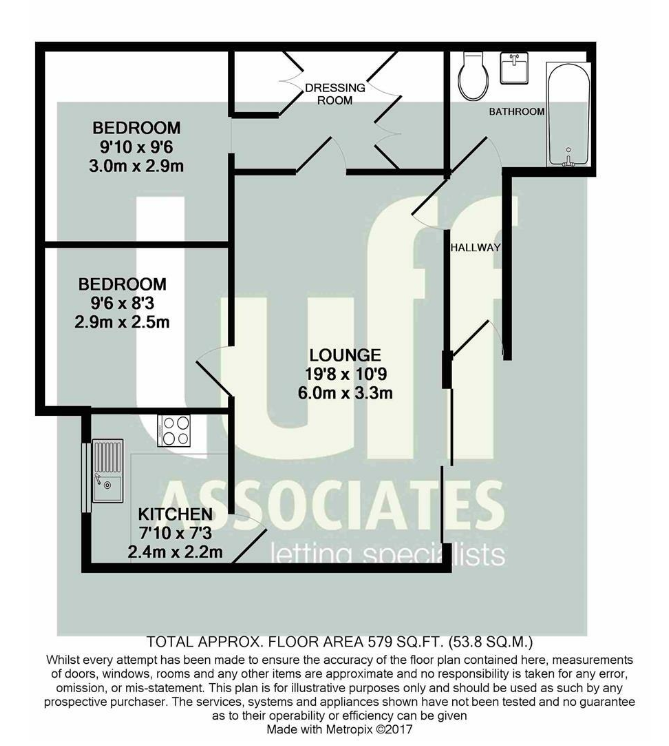

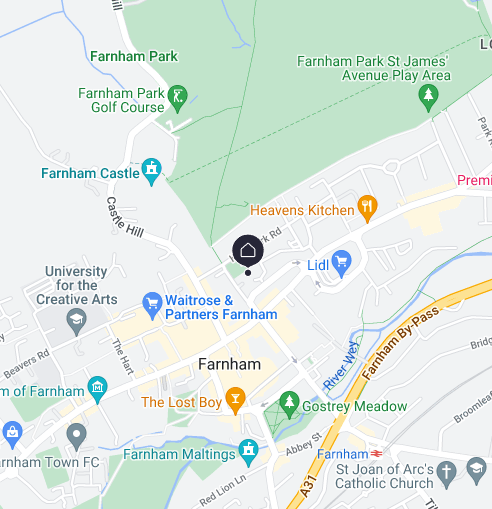

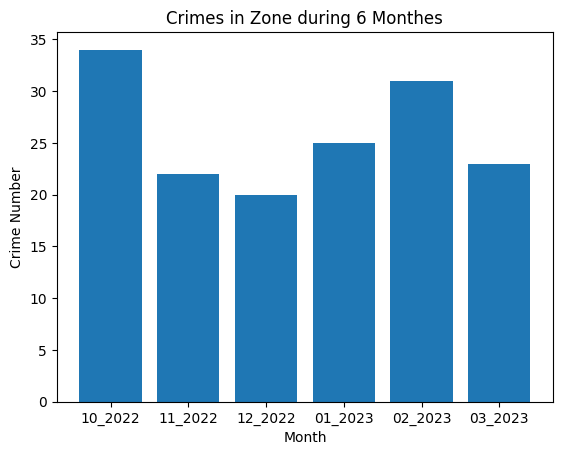

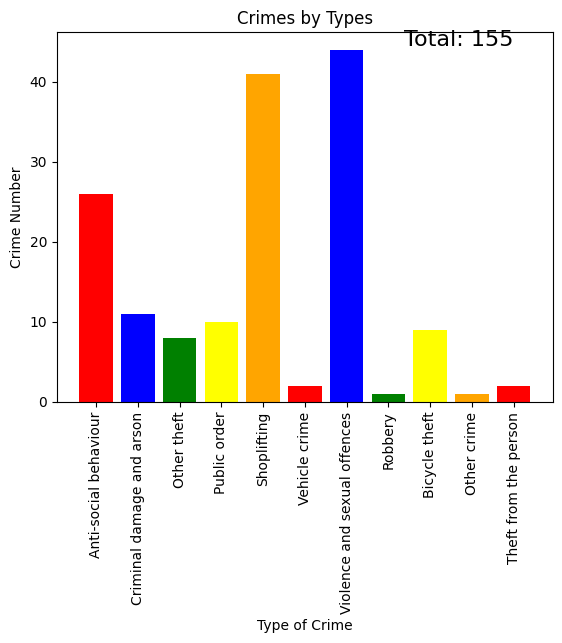

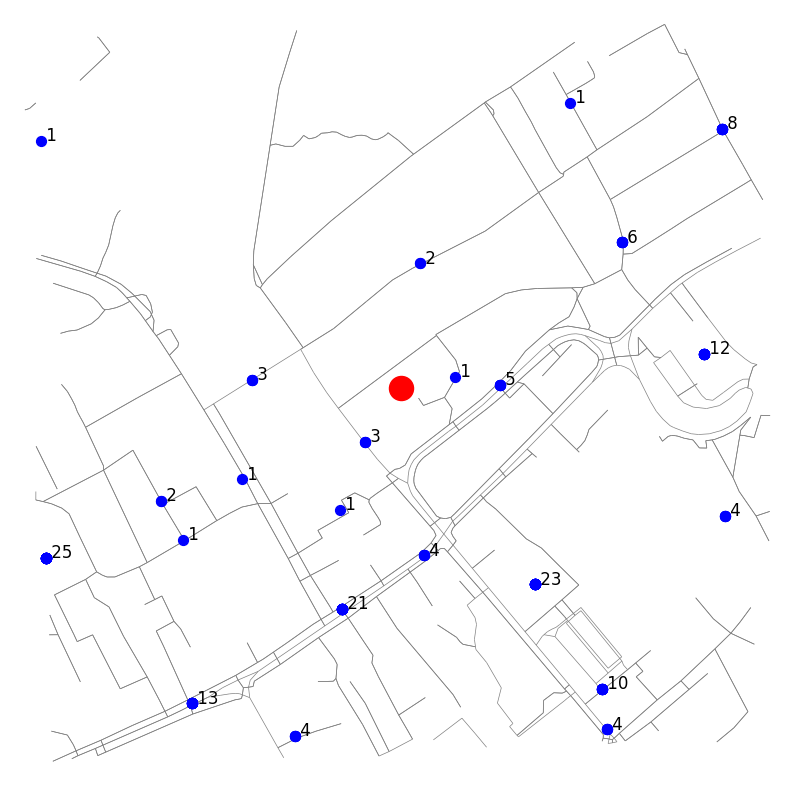

In [91]:

# Initial point

lat = 51.21667972795186
lon = -0.797969455241949	
distance = 300 

res = show_all_info (lat, lon, distance)
#res

------------------------------------------------------------------------------------------------

[Tilford](https://goo.gl/maps/reZ2R3yU7dQ5uVm29)

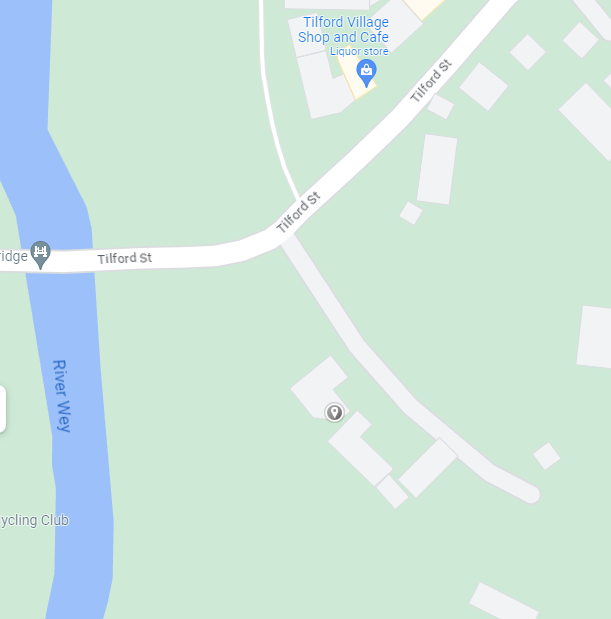

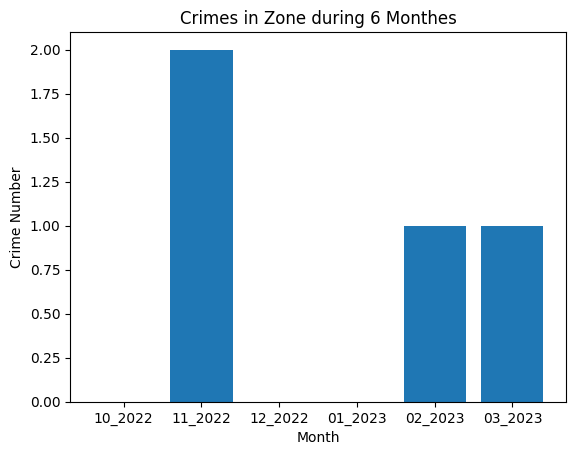

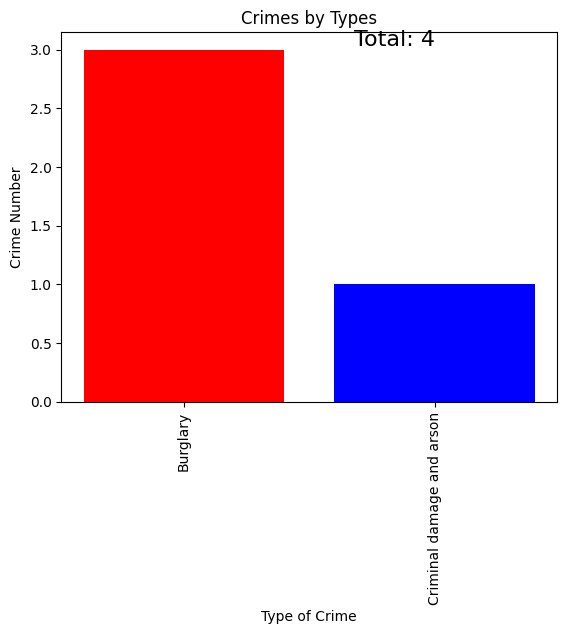

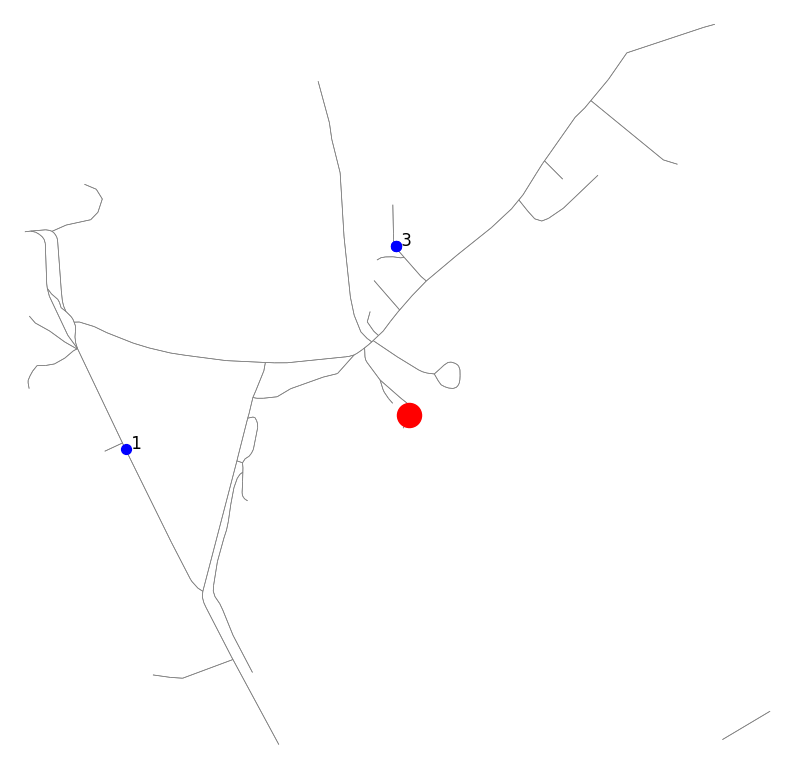

In [93]:

# Initial point

lat = 51.18319759331305
lon = -0.7501043371706082	
distance = 300




res = show_all_info (lat, lon, distance)
#res